In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_context('notebook')
sns.set_style('whitegrid')

# Part 1: Exploratory data analysis

In [101]:
# loading the login.json file
with open('logins.json', 'r') as file:
    logins = json.load(file)

In [102]:
login_times = pd.to_datetime(logins['login_time'])

In [103]:
login_times

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', length=93142, freq=None)

In [104]:
login_times = login_times.sort_values()

In [105]:
login_df = pd.DataFrame(np.random.rand( len(login_times)), index = login_times, columns = ['cnt'])
login_df.sort_index(inplace=True)

In [106]:
# Login counts every 15 minutes from 1970-01-01 to 1970-04-15
counts = login_df.resample('15Min').count()
# login counts per day
counts_day = login_df.resample('D').count()
# login counts per week
counts_week = login_df.resample('W').count()
# login counts per months
counts_month = login_df.resample('M').count()

In [134]:
# adding another column to the counts dataframe to add hour information
counts['hour'] = counts.index.hour

,cnt,hour
1970-01-01 20:00:00,2,20
1970-01-01 20:15:00,6,20
1970-01-01 20:30:00,9,20
1970-01-01 20:45:00,7,20
1970-01-01 21:00:00,1,21


In [107]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
cnt    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


C:\Users\amir\Anaconda3\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


Text(0.5, 0, 'Date')

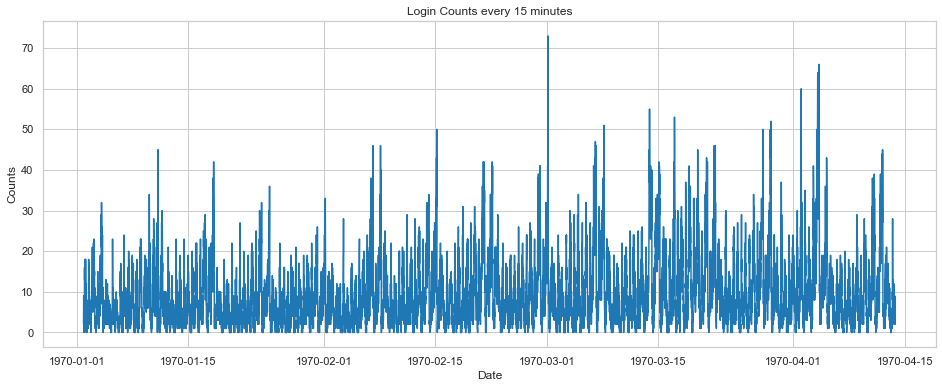

In [108]:
plt.figure(figsize=(16, 6))
plt.plot(counts)
plt.title('Login Counts every 15 minutes')
plt.ylabel('Counts')
plt.xlabel('Date')

**15 minutes period time of the highest count**

In [109]:
x = counts[counts['cnt'] == np.max(counts['cnt'])]
y = x.index.strftime('%Y/%m/%d %H:%M:%S')[0]
print("date and time of the highest count:\n{}".format('\033[1m' + y))

date and time of the highest count:
1970/03/01 04:30:00


**daily counts of the logins, show increasing activity during weekends and decreasing acitvity rest of the week. All the xtick labels below, indicate the saturdays**

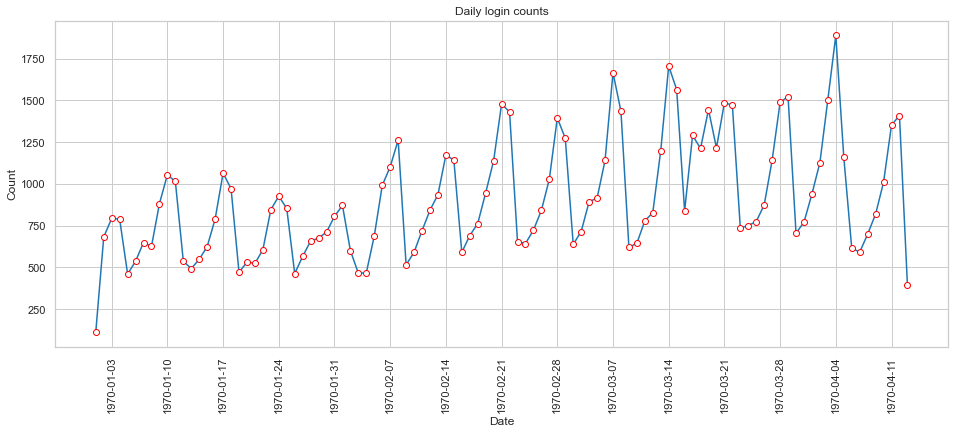

In [110]:
# saturdays in this period of 4 months
saturdays = pd.date_range('1970-01-01', '1970-04-13', freq='W-SAT')
plt.figure(figsize=(16, 6))
plt.plot( counts_day, marker='o', markeredgecolor='r', markerfacecolor='w')
_=plt.xticks(saturdays, rotation='vertical')
plt.title("Daily login counts")
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid('on')

In [111]:
counts_day['days'] = counts_day.index.weekday_name

**The bar plot below, shows that peak of logins happens around 21 PM to 2 AM with also another peak around 12 AM**

Text(0, 0.5, 'Login counts')

<Figure size 864x360 with 0 Axes>

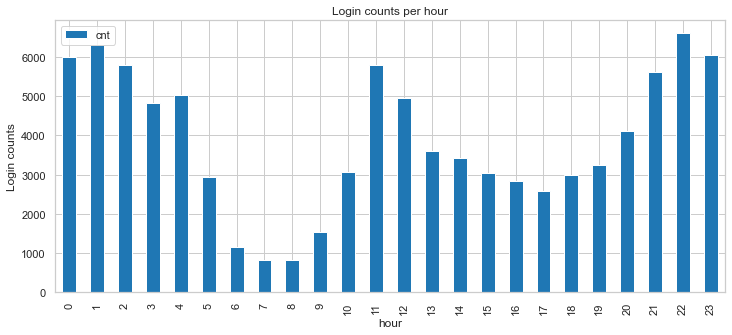

In [140]:
counts.groupby('hour').sum().plot(kind = 'bar', figsize = (12, 5))
plt.title("Login counts per hour")
plt.ylabel("Login counts")

**error bars in the box-whiskers plot below, shows the 5%-95% confidence interval for each hour and the plot itself shows the peak activity time as we discovered using the bar plot**

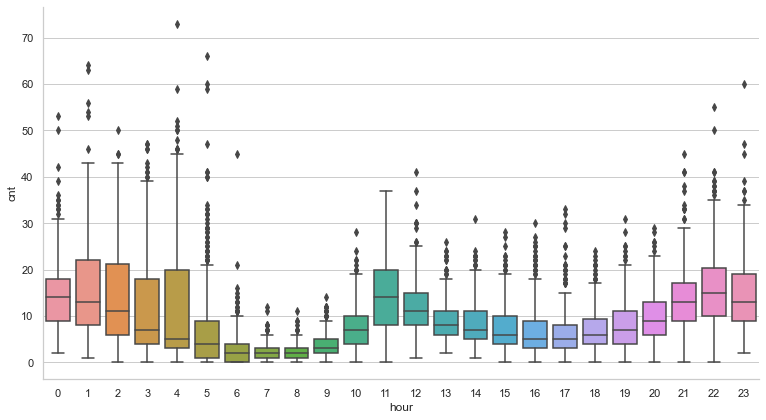

In [148]:
sns.catplot(x = 'hour', y = 'cnt', data = counts, kind = 'box', height = 6, aspect = 1.8)

**bar plot of the total login counts per each week day, which shows the maximum activity during the weekends specially Saturday**

Text(0, 0.5, 'Login counts')

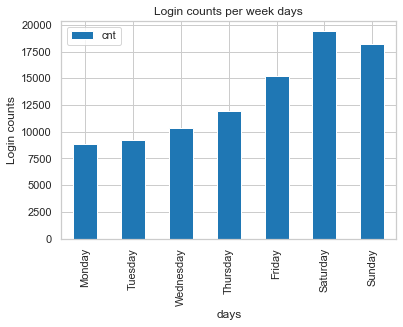

In [151]:
counts_day.groupby('days').sum().reindex(days_order).plot(kind = 'bar')
plt.title('Login counts per week days')
plt.ylabel('Login counts')

Text(0.5, 0.98, 'Login counts for each week day')

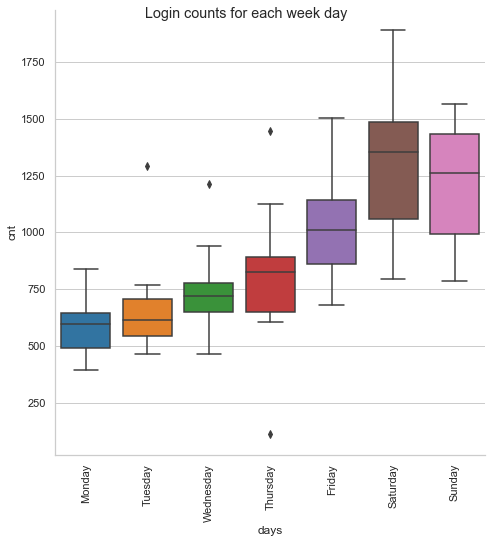

In [132]:
# box plot of login counts for each week day
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.catplot(x = 'days', y = 'cnt',height = 7, order = days_order, data = counts_day, kind='box', orient = 'v')
g.set_xticklabels(rotation = 90)
g.fig.suptitle("Login counts for each week day")

**the bar plot of the login counts per each week since the first week to the last week. the highest login counts happens in 1970-03-15 to 1970-03-22 with saint patrick's day holliday being in 1970-03-17 on Tuesday**

In [153]:
counts_day.head()

,cnt,days
1970-01-01,112,Thursday
1970-01-02,681,Friday
1970-01-03,793,Saturday
1970-01-04,788,Sunday
1970-01-05,459,Monday


Text(0, 0.5, 'Login counts')

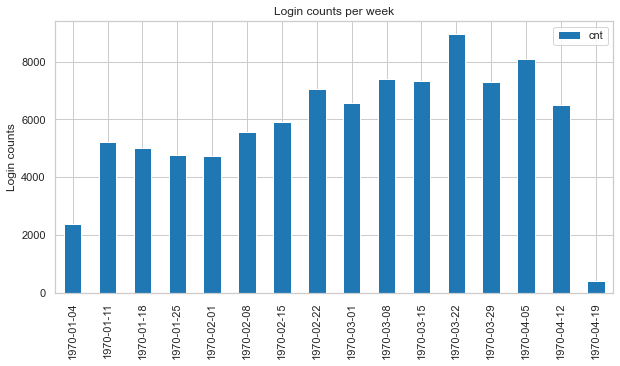

In [141]:
counts_week.plot(kind = 'bar', figsize = (10, 5))
_ = plt.xticks(labels = counts_week.index.date,  ticks = range(len(counts_week)))
plt.title("Login counts per week")
plt.ylabel("Login counts")

**highest login activity happend in march, based on the bar plot below**

Text(0, 0.5, 'Login counts')

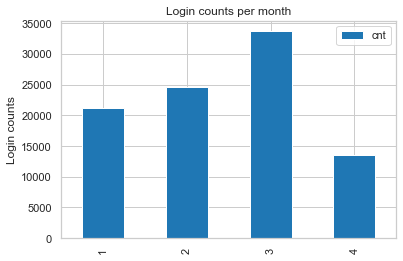

In [99]:
counts_month.plot(kind='bar')
_ = plt.xticks(ticks = range(len(counts_month)), labels = counts_month.index.month)
plt.title("Login counts per month")
plt.ylabel('Login counts')

In [11]:
# Frequency spectrum of the every 15 minutes signal
counts_freq = np.fft.fft(counts[0].values) #- np.mean(counts[0].values))

In [12]:
# Sampling Period
Ts = 15*60
# Sampling Frequency
Fs = 1/Ts
# Highest Signal Frequency obtainable by this sampling period (Nyquist frequency)
Ft = Fs/2
print("Highest resolvable frequency, regarding sampling per 15 minutes:\n{:.5f} Hz".format(Ft))

Highest resolvable frequency, regarding sampling per 15 minutes:
0.00056 Hz


Text(0.5, 0, 'Frequency (Hz)')

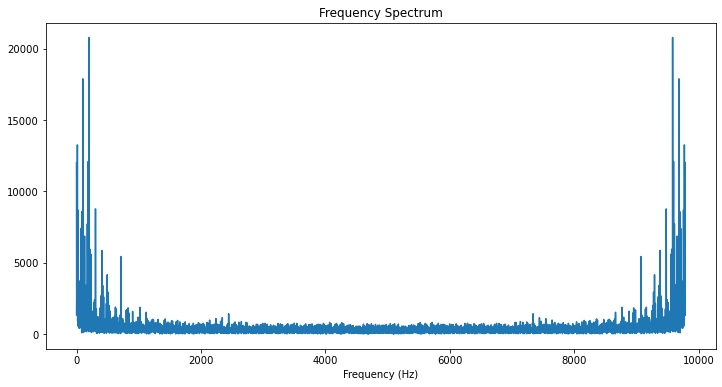

In [62]:
# the bias term (0 frequency) is not shown in the plot
plt.figure(figsize=(12, 6))
#plt.plot(np.linspace(-Ft, Ft, len(counts)), abs(counts_freq))
plt.plot(abs(counts_freq[1:]))
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")

(0.0, 25000.0)

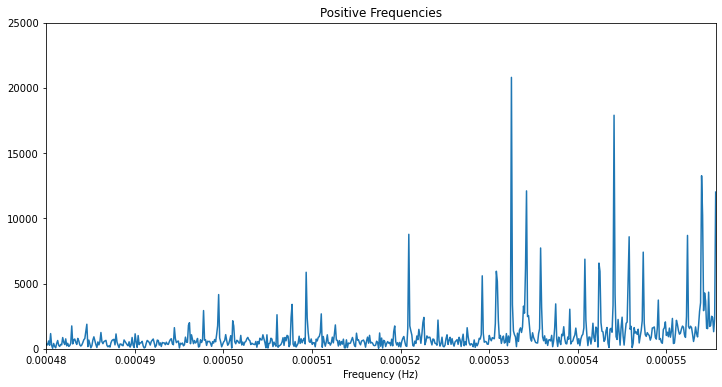

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(-Ft, Ft, len(counts)), abs(counts_freq))
plt.xlabel('Frequency (Hz)')
plt.title("Positive Frequencies")
plt.xlim([0.00048, Ft])
plt.ylim([0, 25000])

In [122]:
np.argsort(abs(counts_freq))[::-1]

array([   0,  204, 9584, ..., 4016, 5181, 4607], dtype=int64)

**Filtering the frequency spectrum of the signal using an ideal high pass filter**

In [123]:
filtered_freq = np.zeros(len(counts_freq))
#filtered_freq[0] = counts_freq[0]
#filtered_freq[300:9488] = counts_freq[300:9488]
filtered_freq[:200], filtered_freq[-200:-1]=counts_freq[:200], counts_freq[-200:-1]
#recon_counts = np.fft.ifft(filtered_freq)
#plt.figure(figsize=(16, 6))
#plt.plot(counts.index[200:9588],  np.real(recon_counts))

C:\Users\amir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


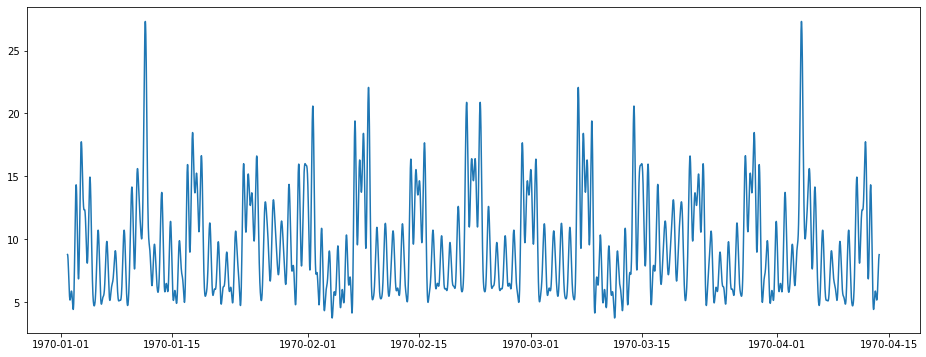

In [124]:
plt.figure(figsize=(16, 6))
plt.plot(counts.index, np.real(np.fft.ifft(filtered_freq)))

# Part 2: Experiments and metrics design

1. Key measure of success would be the increase in toll payment by the drivers, in compare to the mean daily toll payment among them

2. (a) A practical way to implement the experiment is to take the mean of toll payment by the drivers per week, and use the previous data to calculate the mean weekly distribution of the payments and compare to the weekly payment in the new approach 

2. (b) An statistical bootstrap testing would work here, in the sense to take as much previous weekly mean toll payments as possible and do the bootstraping with replacemnt to come up with a mean distribution

2. (c) A measurement of the p-value can indicate the significance of our result, and if the result was due to mere luck or if it is indeed a significant difference in the mean weekly toll payments since the new experiment has been implemented

# Part 3: Predictive modeling

In [2]:
with open('ultimate_data_challenge.json', 'r') as file:
    data = json.load(file)
    
data_df = pd.DataFrame(data)

In [3]:
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
# changing data types from string to datetime
from datetime import datetime
data_df['last_trip_date'] = pd.to_datetime(data_df.last_trip_date)
data_df.signup_date = pd.to_datetime(data_df.signup_date)

**the date below is consider the last trip date, so we consider any rider active within 30 days from this date, as active**

In [6]:
last_date = data_df.last_trip_date.sort_values(ascending=False).iloc[0]   
last_date

Timestamp('2014-07-01 00:00:00')

In [7]:
# if the last trip date is within the last 30 days, the label is 1 else 0
delta = last_date - data_df.last_trip_date
# this new column will be used as the labels in our model
data_df['active'] = (delta.dt.days <= 30)*1

**Fraction of retained users**

In [8]:
# the fraction of users who retained their subscription
retained_fraction = np.sum(data_df.active)/len(data_df)
print('fraction of the observed users retained:\n{:.2f}'.format(retained_fraction))

fraction of the observed users retained:
0.38


In [9]:
# dropping the rows with NA values
data_df.dropna(subset = ['avg_rating_by_driver', 'phone', 'avg_rating_of_driver'], inplace=True)

In [10]:
# calculating how many months each user has been using this service
month_delta = data_df.last_trip_date - data_df.signup_date
data_df['months'] = month_delta.dt.days//30 + 1

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
active                    41445 non-null int32
months                    41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(2), object(2)
memory usage: 5.6+ MB


In [12]:
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,months
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,4
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,6
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,2


# Exploratory Data Analysis

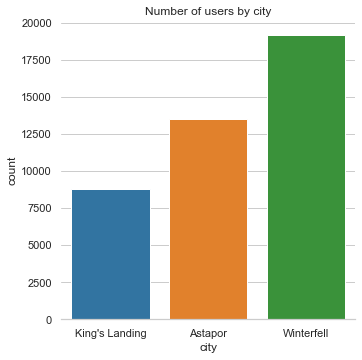

In [13]:
# number of users per each city
sns.set_palette('tab10')
sns.catplot(x = 'city', data = data_df, kind='count')
plt.title('Number of users by city')
sns.despine(left = True)

Text(0.5, 1.0, 'Driver rating by city')

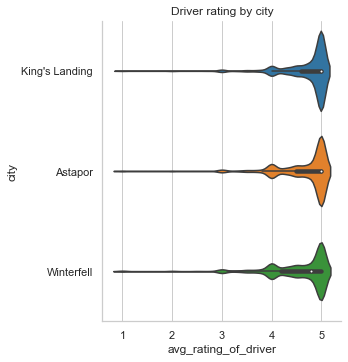

In [14]:
# rider's average rating of their drivers over all their trips, for each city
sns.catplot(y = 'city', x = 'avg_rating_of_driver', data=data_df, kind='violin')
#sns.lvplot(x = 'avg_rating_of_driver', y = 'city', data = data_df)
plt.title('Driver rating by city')

Text(0.5, 1.05, 'Driver rating per city\nper phone')

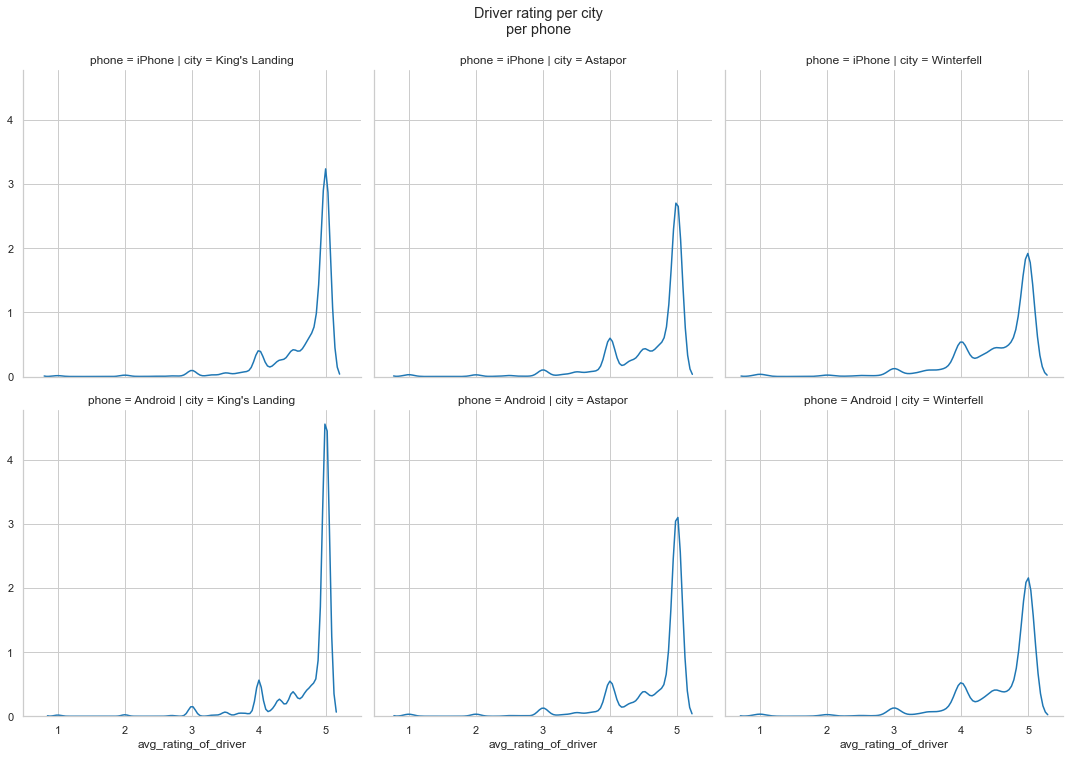

In [15]:
# checking wether different phones or different cities have different rating pattern for drivers
fg = sns.FacetGrid(data_df, col = 'city',row = 'phone', height=5 )
fg.map(sns.distplot, 'avg_rating_of_driver', hist = False).add_legend()
fg.fig.suptitle('Driver rating per city\nper phone', y = 1.05)

Text(0.5, 1.1, 'Fraction of trips in first 30 days\nper city')

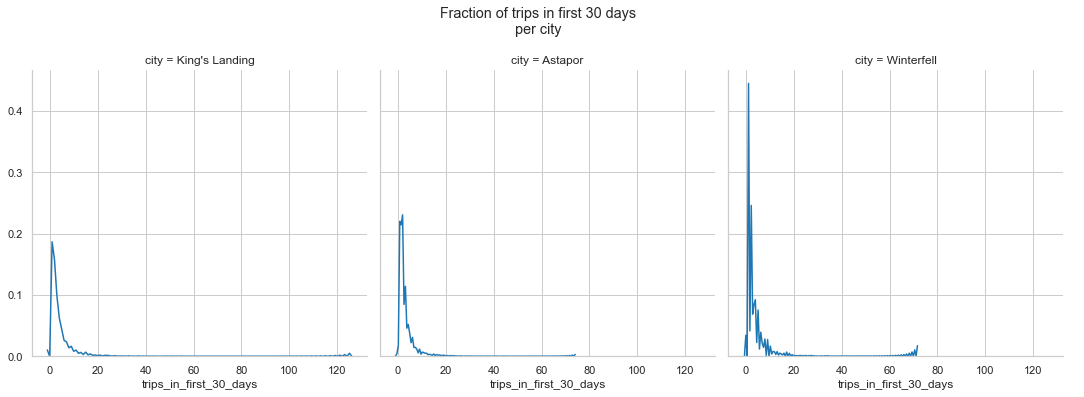

In [16]:
# histogram of number of trips in first 30 days per each city
fg2 = sns.FacetGrid(data_df, col = 'city', height=5)
fg2.map(sns.distplot, 'trips_in_first_30_days', hist = False).add_legend()
fg2.fig.suptitle('Fraction of trips in first 30 days\nper city', y=1.1)

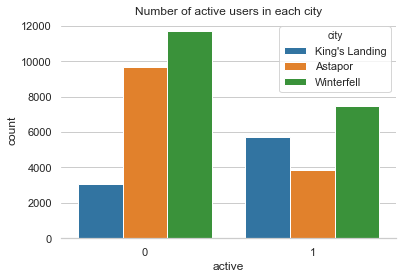

In [17]:
# number of active and non-active users per city
sns.countplot(x = 'active', data = data_df, hue = 'city')
plt.title('Number of active users in each city')
sns.despine(right = True, top=True, left = True)

Text(0.5, 1.0, 'Pairwise correlation coefficient')

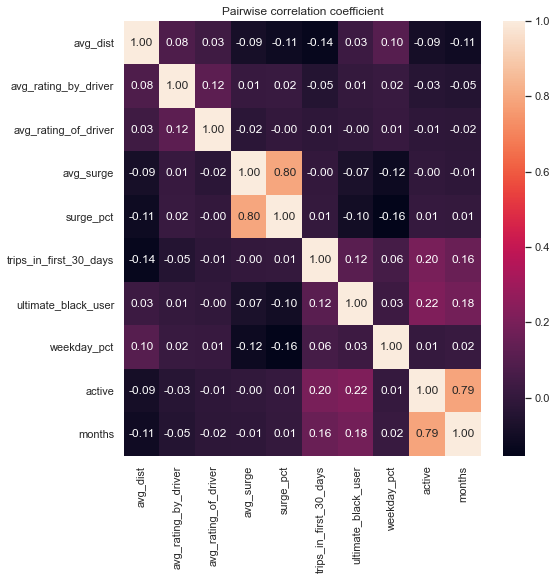

In [18]:
# heat map of correlation between all the variables in the data
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
sns.heatmap(data_df.corr(), annot = True, fmt = '.2f', ax = ax)
plt.title('Pairwise correlation coefficient')

Text(0.5, 1.0, 'Driver vs User ratings')

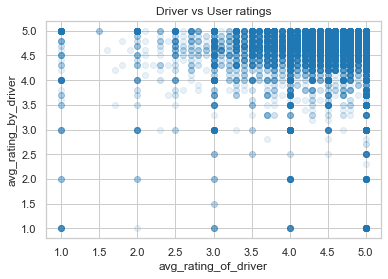

In [22]:
# scatter plot of average rating of driver vs average rating by driver
sns.regplot(x = 'avg_rating_of_driver', y = 'avg_rating_by_driver', data=data_df, scatter_kws = {'alpha':.1}, fit_reg=False)
plt.title('Driver vs User ratings')

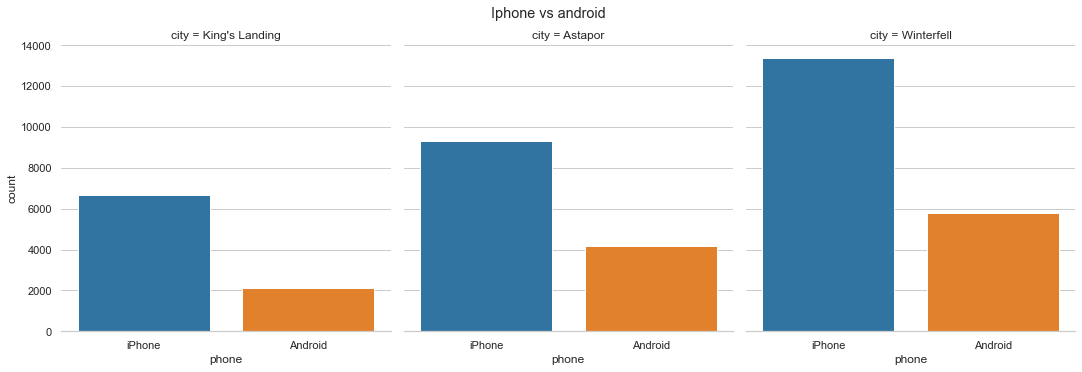

In [20]:
# number of iphones vs android phones per city
g = sns.catplot(x = 'phone', data = data_df, kind='count', col='city', palette = 'tab10')
g.fig.suptitle('Iphone vs android', y = 1.03)
sns.despine(left = True)

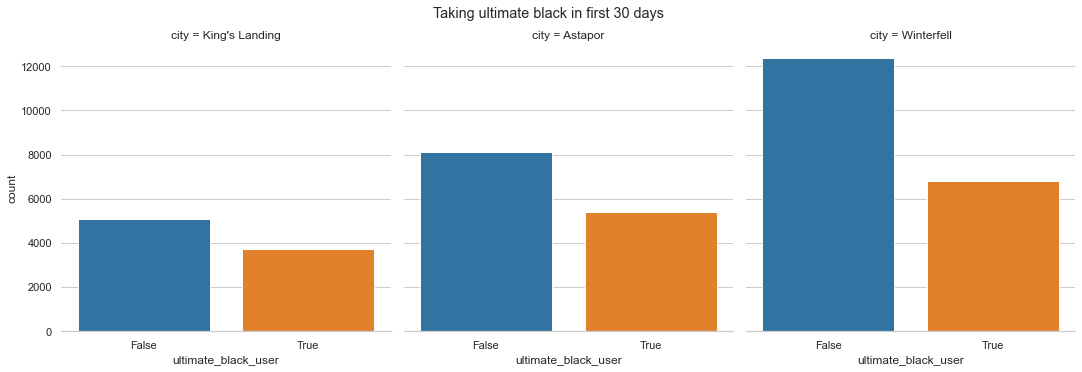

In [21]:
g2 = sns.catplot(x = 'ultimate_black_user', data = data_df, kind = 'count', col = 'city')
g2.fig.suptitle('Taking ultimate black in first 30 days', y = 1.03)
sns.despine(left = True)

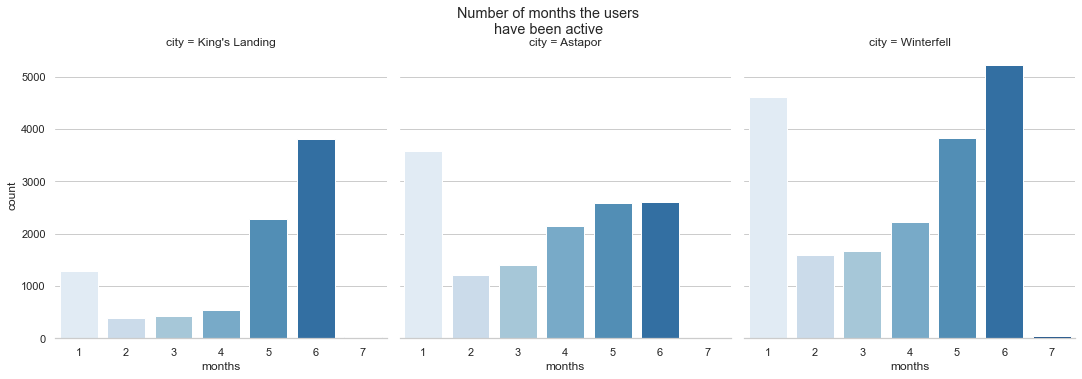

In [22]:
# a bar plot to show the distribution of users per months of subscriptions per each city
g3 = sns.catplot(x = 'months', data = data_df, kind = 'count', palette = 'Blues', col = 'city')
g3.fig.suptitle('Number of months the users\nhave been active', y = 1.05)
sns.despine(left = True)

In [23]:
# using dummy variables instead of categorical data for 3 columns below
data_df_dummy = pd.get_dummies(data_df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

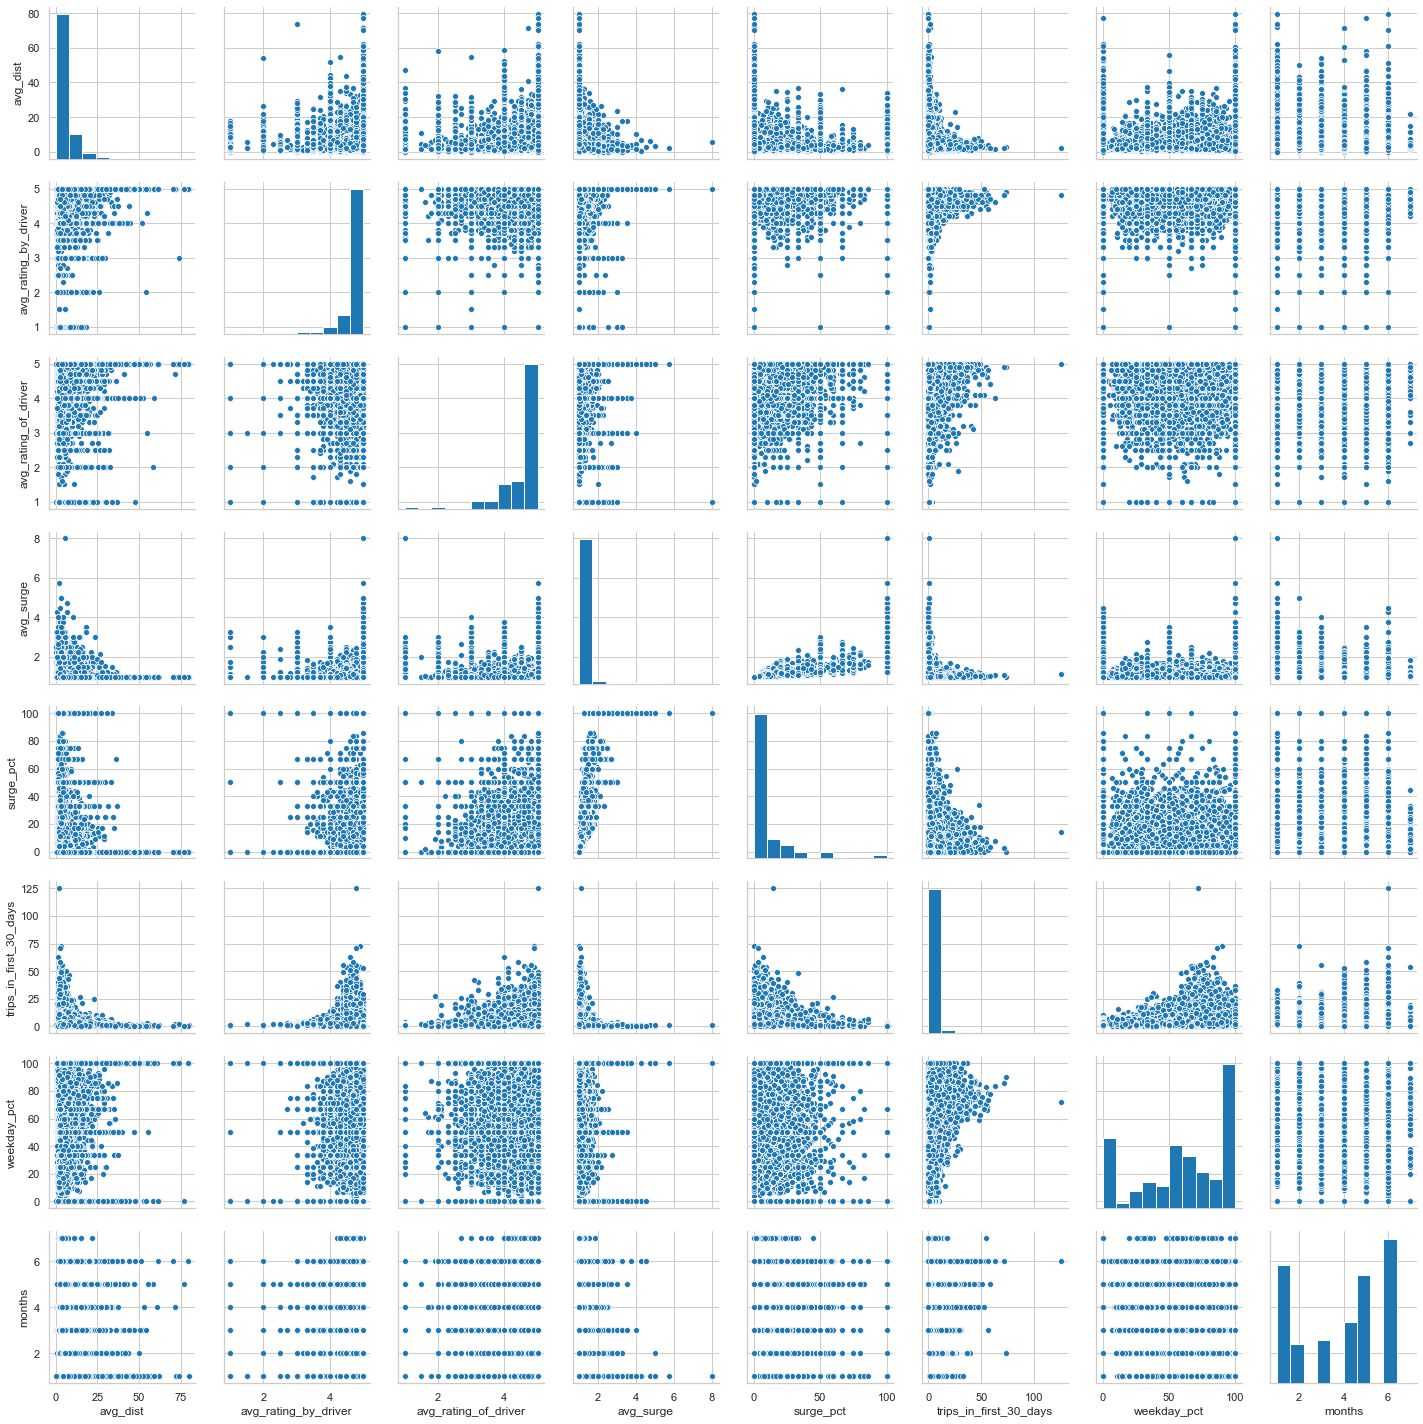

In [24]:
# a matrix of scatter plots between all the variable specified
sns.pairplot(data_df_dummy, vars = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 
                              'trips_in_first_30_days', 'weekday_pct', 'months'])

# Building the model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [26]:
data_df_dummy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active,months,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,5,1,0,1,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,4,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,1,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,6,1,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,2,0,1,0,0


In [27]:
# specifying the data and the label
X = data_df_dummy.drop(['last_trip_date', 'signup_date', 'active', 'months'], axis=1)
y = data_df_dummy['active']#.values.reshape(-1, 1)

In [28]:
# dividing the data between training and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y)

In [29]:
rf = RandomForestClassifier()

**Cross validation score**

In [30]:
# cross validation, dividing the data into 5 partitions 
cv_score = cross_val_score(rf, X_train, y_train)

In [31]:
cv_score

array([0.75889626, 0.74966068, 0.74754939, 0.7588599 , 0.74724778])

In [32]:
rf.fit(X_train, y_train)
print("the accuracy resulting from random forst classifier:\n{:.2f}".format(rf.score(X_test, y_test)))

the accuracy resulting from random forst classifier:
0.75


**Confusion matrix for binary classification**

In [34]:
y_pred = rf.predict(X_test)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['not active', 'active' ],
                           columns = ['predicted not active', 'predicted active'])
conf_matrix


,predicted not active,predicted active
not active,3847,1035
active,1060,2347


**Precision, recall and f-score**

In [150]:
print(classification_report(y_test, y_pred, target_names=['not active', 'active']))

              precision    recall  f1-score   support

  not active       0.78      0.79      0.79      4882
      active       0.70      0.69      0.69      3407

    accuracy                           0.75      8289
   macro avg       0.74      0.74      0.74      8289
weighted avg       0.75      0.75      0.75      8289



**Importance of each feature of the model**

<BarContainer object of 11 artists>

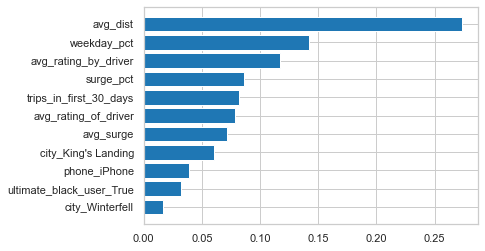

In [58]:
features, values = X.columns, rf.feature_importances_
feature_importances = list(zip(features, values))
feature_importances = sorted(feature_importances, key = lambda x: x[1])
features_sorted, importances_sorted = zip(*feature_importances)
plt.barh(features_sorted, importances_sorted)

**based on the feature importances from the figure above, the most important features are:**
1. Average distance in miles per trip taken in first 30 days from signup 
2. The percent of the user's trips occurring in the weekdays
3. The rider's average rating over all of their trips

**the most important factors in a retained subscription suggests:**
- Encourage drivers to be willing to cover longer distances
- Lower the cost in the weekdays to persuade riders to use this service
- Choosing better services, so riders give better feedback about their experience